In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import ai.neural_network as nnet

In [3]:
batch_size = 30
epochs = 600
learning_rate = 0.001

In [4]:
train_set = torchvision.datasets.MNIST(root = '/home/carson/Desktop/Archive/Computing/Projects/Python/Data',
                                        train=True,
                                        transform=torchvision.transforms.ToTensor(),
                                        download=True)
test_set = torchvision.datasets.MNIST(root = '/home/carson/Desktop/Archive/Computing/Projects/Python/Data',
                                       train=False,
                                       transform=torchvision.transforms.ToTensor(),
                                       download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)


In [5]:
model = nnet.NNet([784, 16, 10], torch.nn.ModuleList([torch.nn.Tanh(), torch.nn.Softmax(dim=1)]))
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
loss_items = list()

for t in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        encoder = nnet.encoding_function(10)
        labels = encoder(labels)
        
        images = images.reshape(-1,28*28)
        outputs = model(images)
        
        
        loss = loss_function(outputs, labels)
        
        if i%1000 == 0:
            loss_items.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

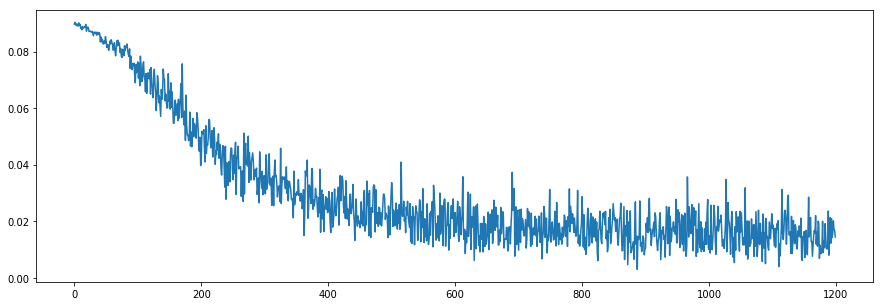

In [7]:
plt.figure(figsize=(15,5))
plt.plot(loss_items)

In [8]:
with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 91 %


In [10]:
torch.save(model.state_dict(), 'MNIST-91')